<a href="https://colab.research.google.com/github/ParzivalWins/Alexa2/blob/master/Build_Customer_Demographic_Profile_WorkBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://global-uploads.webflow.com/5baafc2653bd67278f206724/5be267a03f7813daf821b31e_safegraph-logo-hidpi%403x-p-500.png)

# A Workbook To Analyze Demographic Profiles from SafeGraph Patterns Data

--------------
**[Ryan Fox Squire](https://www.linkedin.com/in/ryanfoxsquire/) | Data Scientist, [SafeGraph](https://safegraph.com/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=demo_profile_workbook)**


Nov 2019
--------------
This notebook is 1 of 2 Google Co-Lab notebooks complementing a [Blog Series](https://medium.com/@ryan.fox.squire/safegraphs-data-on-brick-and-mortar-customer-demographics-is-the-most-accurate-and-comprehensive-86915c507c20) focused on analyzing customer demographics using SafeGraph data. This is the Analysis notebook. It glosses over the methodology so you can run your own demographic analysis easily in less than 5 minutes. If you want to learn how this all works or dive into the methodology step-by-step, then read the accompanying [Teacher Notebook](https://colab.research.google.com/drive/1qqLRxehVZr1OBpnbHRRyXPWo1Q98dnxA#offline=true&sandboxMode=true)

--------------
*Share this notebook: [Shareable Link](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#offline=true&sandboxMode=true)*

This is a working notebook for you to analyze the demographic profiles of restaurant and retail brands in the US using SafeGraph Patterns data! Exciting! If you want to understand how this notebook works, check out the [Teacher Notebook](https://colab.research.google.com/drive/1qqLRxehVZr1OBpnbHRRyXPWo1Q98dnxA#sandboxMode=true&scrollTo=10tdtPTrFZC-) with in-depth explanations of the code, data, and statistics. 

This notebook will give you quick and easy demographic profiles on the following dimensions: 

1. Age aka `Sex By Age`
2. `Race`
3. Ethncity aka `Hispanic Or Latino Origin`
4. Education aka `Educational Attainment For The Population 25 Years And Over`
5. Income aka `Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)`




## **How to use this notebook**:


---


**Quick Start:** 
1. You can run this notebook using some data I've prepared.  You only need to do one thing: In the cell containing `your_name = "EDIT YOUR NAME"`, you should edit your name, run the cell, and follow the prompt to authenticate your google account.
2. **Everything will just run! Enjoy!**




In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# special libraries to allow file access
from google.colab import drive as mountGoogleDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
your_name = "EDIT_YOUR_NAME_HERE" # << You should edit this

################################
print(f"Hello {your_name}, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.\nYou may have to click on two separate links, and copy/paste two codes, serially.")
################################
# These commands allow the notebook to read your data from your GoogleDrive
mountGoogleDrive.mount('/content/mountedDrive')
print(f"Congrats {your_name}, you mounted your google drive!")
################################
# These commands allow you to read directly from SafeGraph's public GoogleDrive containing Census Data
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!".format(your_name))

Hello EDIT_YOUR_NAME_HERE, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.
You may have to click on two separate links, and copy/paste two codes, serially.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/mountedDrive
Congrats EDIT_YOUR_NAME_HERE, you mounted your google drive!
You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!


**Optional -- Customize Your Analysis**

Want to bring your own data to the party?  It's super easy to use this notebook to analyze ***any*** brands or places in SafeGraph Patterns.  If not, then just skip these steps and go to the next cell. 

**Step 0.**   Save this Google CoLab notebook to your Google Drive by clicking "Copy To Drive" in the upper left. 

**Step 1.** Get SafeGraph Patterns Data (if you already have Patterns, skip to step 2)
1. Go to [The SafeGraph Data Bar](https://shop.safegraph.com/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=demo_profile_workbook), and get Patterns data.
  1. Select which brand(s) you want to analyze. Maybe you and a top competitor?
  2. Use the coupon code `AnalyzeDemographics` for $200 of free data. Wow! 
  3. Pro-tip: You can filter down to a State (Region), or a city if you want to bring down the cost (but fewer data points means noisier data).
2. Download the data. After downloading, **unzip** the file (right-click > `Open` or `Unzip`). After unzipping, you will have a directory containing multiple files:
  1. `home_panel_summary.csv` *
  2.  one or more `patterns` csv files *
  3. `visit_panel_summary.csv` 
  4. and a `README.txt`
  5. \* Starred files are essential files for _this_ notebook.  For complete documentation on these files see [SafeGraph Docs.](https://docs.safegraph.com/docs/places-schema#section-pattern/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=demo_profile_workbooks)

**Step 2.** Copy Patterns Into your Google Drive
  1. Now, open your [Google Drive](https://drive.google.com), create a new folder (e.g., `SafeGraph_Patterns`) and upload the ***unzipped*** SafeGraph files from Step 1 into your new GDrive folder. Easiest is to click-drag the entire folder into your Google Drive. 
  2. Mount your Google Drive to this notebook. You probably already did this by running the above cell. You should see a message printed above that says `Mounted at /content/mountedDrive`. (Note: SafeGraph does not have access to your data, this notebook is living in your own private workspace!). 

**Step 3.** Copy/paste your mounted drive path

1. In the left-side pop-out panel, click `Files` (next to `Code Snippets`). Find the folder called `mountedDrive`. Click into `mountedDrive` (be patient, sometimes it lags) and locate the directory into which you uploaded the SafeGraph Patterns data above in **Step 2**. 
2. Right-click on that folder and select `Copy path`. Paste the path into the cell below for the variable `patterns_directory_drive`. 
3. And make sure that `i_want_to_use_my_own_patterns_data` = `True`



In [0]:
# For Quick Start, make no changes, just run. Otherwise, see **Step 3.** Copy/paste your mounted drive path
i_want_to_use_my_own_patterns_data = False
patterns_directory_drive = "/content/mountedDrive/My Drive/{{whatever is your path}}"  #  "/content/mountedDrive/My Drive/WellsFargoBoAPatterns/Cali-WellsFargo-BankofAmerica-PATTERNS-2019_09-2019-11-01"

# ~~~~~~
if(i_want_to_use_my_own_patterns_data):
  print(f"OK, {your_name}! We will read patterns data from: {patterns_directory_drive}\nTesting that drive is mounted and we can find the data...")
  test = pd.read_csv(os.path.join(patterns_directory_drive, 'home_panel_summary.csv'))
  print("SUCCESS! We found your Patterns data!")
  print("Census Data will be read from SafeGraph's GDrive object: {0}".format(drive))
else:
  print(f"Great, {your_name}! We will use the Default Notebook Data located in GDrive object: {drive}")
  patterns_directory_drive=None


Great, EDIT_YOUR_NAME_HERE! We will use the Default Notebook Data located in GDrive object: <pydrive.drive.GoogleDrive object at 0x7f35719d7dd8>


We've written some python functions and [packaged them into a module](https://github.com/ryanfoxsquire/safegraph_demo_profile) to make analysis easy for you. For a full explanation of what's going on and how this code works, see the [Teacher Notebook](https://colab.research.google.com/drive/1qqLRxehVZr1OBpnbHRRyXPWo1Q98dnxA#sandboxMode=true&scrollTo=10tdtPTrFZC-). 

To load these functions, we install the module from github. 

In [0]:
! pip install -q --upgrade git+https://github.com/ryanfoxsquire/safegraph_demo_profile
from demo_profile_functions import demo_profile_functions as dpf

# Crunch The Numbers

We are ready to build some demographic profiles!

* Below is a list of the brands in your patterns data. Select some of them to analyze using the variable `brands_list`. 
* There are a lot of numbers to crunch, so the analysis takes 1-2 mins, depending on how many POI and how many demographic dimensions you are analyzing. If you want to follow along, set `print_steps` = True. 
* By default we analyze all 5 demographic dimensions (Age, Race, Ethnicity, Education, Income). However you can speed things up by setting some of these to `False`. 
* After the numbers have crunched, run the following cell to see the charts. 

In [0]:
# Re-Run to see a list of brands in your data
patterns_raw = dpf.read_patterns_data(patterns_directory_drive, drive=drive).dropna(subset=['brands'])
print("These are the brand available for analysis in your data: ")
all_brands = sorted([brand for brand in patterns_raw.brands.unique() if ',' not in brand])
all_brands

These are the brand available for analysis in your data: 


['24 Hour Fitness',
 'Allen Edmonds',
 'Burger King',
 'CB2',
 'Costco Wholesale Corp.',
 'Crate and Barrel',
 'DSW (Designer Shoe Warehouse)',
 'Equinox Fitness Clubs',
 "Lowe's",
 "McDonald's",
 'Orangetheory Fitness',
 'Panda Express',
 'Panera Bread',
 'Subway',
 'Target',
 'The Home Depot',
 'Walmart',
 'West Elm']

In [0]:
# Edit this cell to configure your analysis 
%%time

brands_list =  ["Walmart", "Target"]  # pick any of the brands listed above
safegraph_place_id_whitelist = None   # None or list # these SGPIDS must have a brand listed in brands_list
print_steps = False                   # if True, will print processing steps for transparency

demographic_options = {'Sex By Age': True, # Select True for which dimensions you want to analyze
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }

# Configure above this line
# --------------------------
print(f"Thanks for your patience, {your_name}, this may take 1-2 minutes...")

demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
visitors_join, final_results = dpf.master_demo_analysis(None,
                                                        patterns_directory_drive,
                                                        drive,
                                                        demos_to_analyze,
                                                        brands_list, 
                                                        safegraph_place_id_whitelist,
                                                        verbose=print_steps)



Thanks for your patience, EDIT_YOUR_NAME_HERE, this may take 1-2 minutes...
CPU times: user 1min 13s, sys: 6.04 s, total: 1min 19s
Wall time: 1min 32s


* *Pro-tip: if you plan a lot of iterative exploratory data analysis, then I suggest separating out the steps of* [master_demo_analysis()](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/master/demo_profile_functions/demo_profile_functions.py#L597) *so that you don't have to keep re-running* `get_patterns_master()` *and* `get_census_master()` *(both slow steps).*

# Visualize Customer Demographic Summaries

* There is one chart for each demographic dimensions (Age, Race, Ethnicity, Education, and Income). 

* The Y-axis shows `% of Visitors to Brand`. If you surveyed a group of random visitors to this Brand, what % of them would fall into a particular demographic segment? 

* For `chart_type` = `stacked_bar` the X-axis separates different Brands, and each color is a demographic segment. 

* For `chart_type` = `bar` or `line`, the X-axis shows the different Demographic segments. Each color is a Brand; the bars for each color (Brand) add up to 100%. 

* Error bars represent 95% confidence intervals of estimate of the mean rate. For very large samples, the confidence interval may be too small to see. 

* *Pro-Tip: I personally find `chart_type` = `bar` or `line` the easiest way to compare demographic segment between two brands.*

* For full details on how these charts are made and how the statistics are calculated see the [Teacher Notebook.](https://colab.research.google.com/drive/1qqLRxehVZr1OBpnbHRRyXPWo1Q98dnxA#sandboxMode=true&scrollTo=10tdtPTrFZC-)

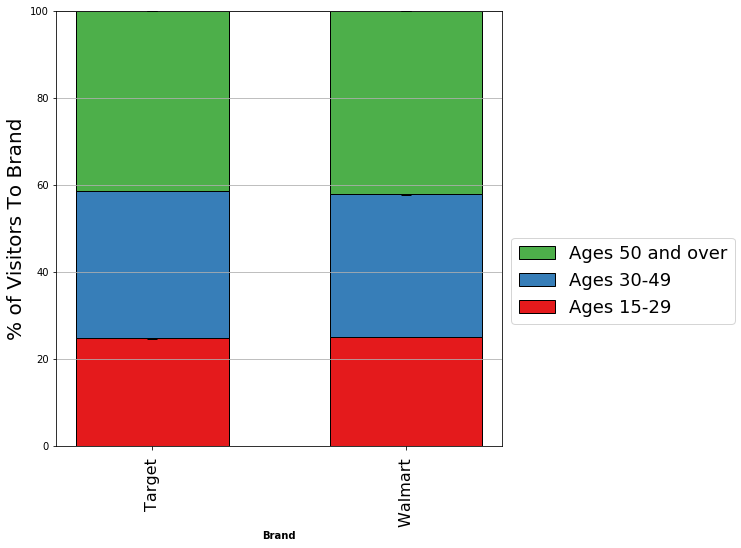

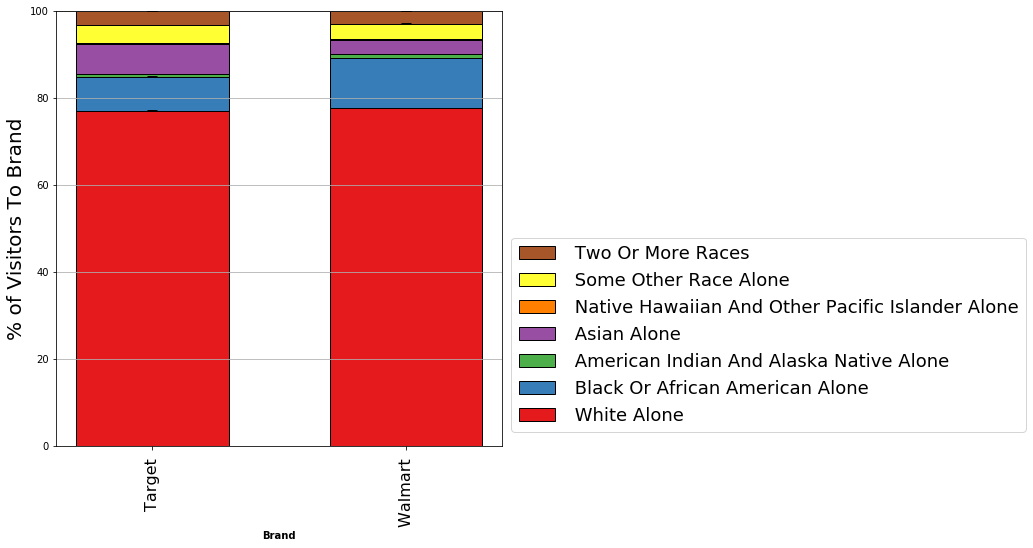

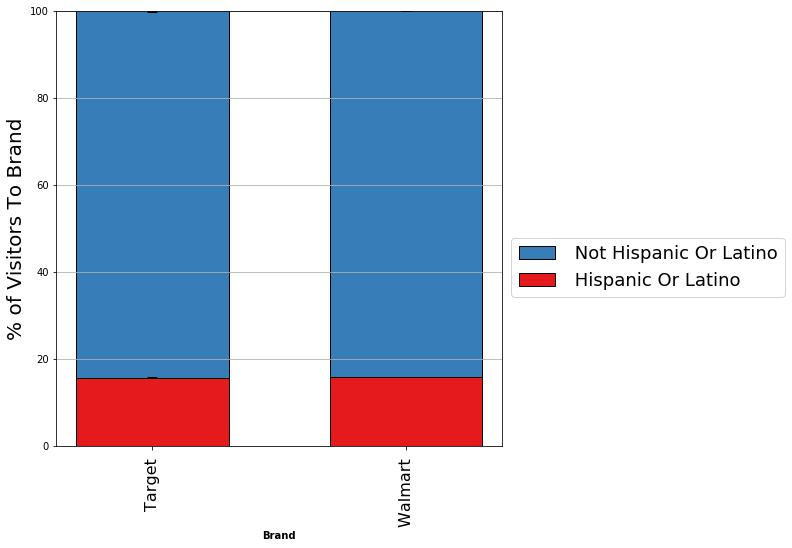

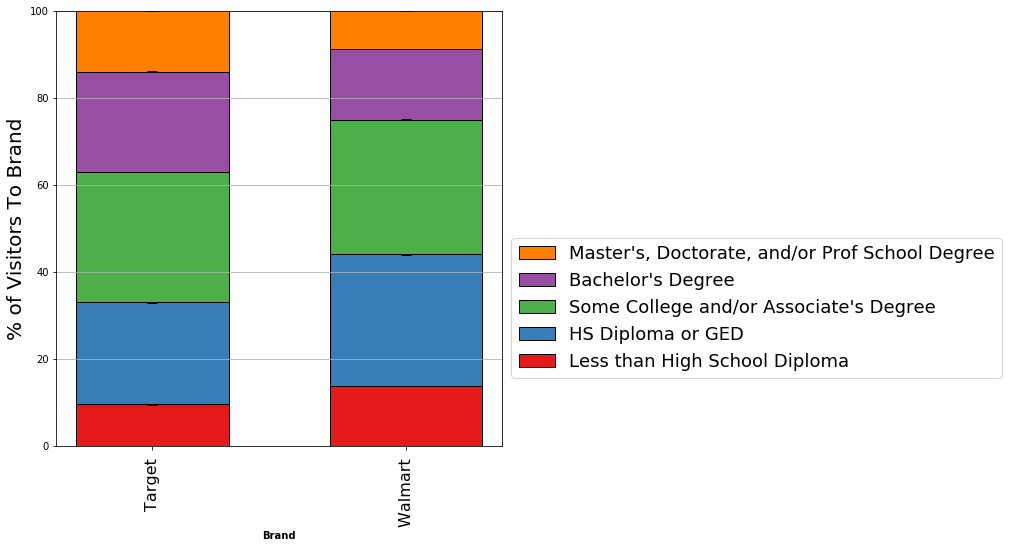

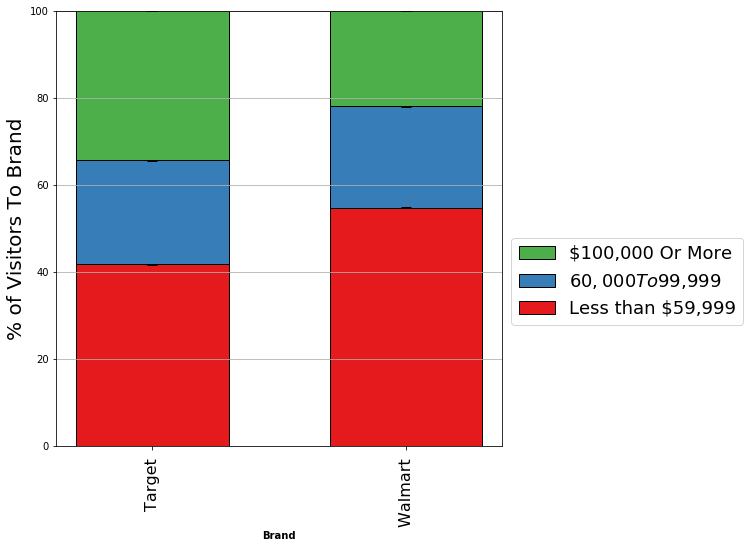

In [0]:
chart_type = 'stacked_bar' # 'bar', 'line', or 'stacked_bar'
for demo in demos_to_analyze:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_ = final_results[final_results.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_,  chart_type=chart_type, show_error=True, fig_size=[8,8]) 


---

*Thanks for reading! If you found this useful or interesting please upvote and share with a friend.* 

*You are strongly encouraged to try out a sample of SafeGraph patterns data for free, no strings attached at the [SafeGraph Data Bar](https://shop.safegraph.com/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=demo_profile_workbook).*  *Use coupon code* **`AnalyzeDemographics`** *for $200 worth of free data!*

---

Contact: 
* Please send us your ideas, feedback, bug discoveries and suggestions: datastories@safegraph.com
* Or leave us a [comment on the blog](https://blog.safegraph.com/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=demo_profile_workbook). 


Technical Notes: 

In [0]:

import platform
print("This notebook is running python version: {0}".format(platform.python_version()))
print("This notebook is running pandas version: {0}".format(pd.__version__))

# Note This is what the original author is running:
#     This notebook is running python version: 3.6.8
#     This notebook is running pandas version: 0.25.3

This notebook is running python version: 3.6.8
This notebook is running pandas version: 0.25.3
